In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Use the unzip shell command to unzip the file
#!unzip '/content/drive/My Drive/Data/GTSRB/GTSRB_Final_Training_Images.zip' -d '/content/drive/My Drive/Data/GTSRB/Train'  # Unzips into /content/drive/My Drive/Data/GTSDB directory
#!unzip '/content/drive/My Drive/Data/GTSRB/GTSRB_Final_Test_Images.zip' -d '/content/drive/My Drive/Data/GTSRB/Test'  # Unzips into /content/drive/My Drive/Data/GTSDB directory

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/07632.ppm  
  inflating: /content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/07633.ppm  
  inflating: /content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/07634.ppm  
  inflating: /content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/07635.ppm  
  inflating: /content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/07636.ppm  
  inflating: /content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/07637.ppm  
  inflating: /content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/07638.ppm  
  inflating: /content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/07639.ppm  
  inflating: /content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/07640.ppm  
  inflating: /content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/07641.ppm  
  inflating: /content/drive/My Drive/Data/GTSRB/Test/GTSRB/

In [ ]:
import os
# Check the contents of the unzipped folder
unzipped_path = '/content/drive/My Drive/Data/GTSRB'  # Update with your extraction path
print(os.listdir(unzipped_path))

['GTSRB_Final_Test_Images.zip', 'GTSRB_Final_Training_Images.zip', 'Train', 'Test']


In [ ]:
#!pip install tensorflow pandas opencv-python

In [ ]:
import os
# Check the contents of the unzipped folder
unzipped_path = '/content/drive/My Drive/Data/GTSRB'  # Update with your extraction path
print(os.listdir(unzipped_path))

['GTSRB_Final_Test_Images.zip', 'GTSRB_Final_Training_Images.zip', 'Train', 'Test']


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Define paths to dataset directories
train_dir = '/content/drive/My Drive/Data/GTSRB/Train/GTSRB/Final_Training/Images/'
test_dir = '/content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/'

# Define image size for resizing
IMG_SIZE = 32  # Resize images to 32x32

# Helper function to load images and labels
def load_data(data_dir):
    images = []
    labels = []

    # Valid image file extensions
    valid_extensions = ['.jpg', '.jpeg', '.png', '.ppm']

    # Loop through each subdirectory (which corresponds to a class)
    for label_dir in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label_dir)

        if os.path.isdir(label_path):
            label = int(label_dir)  # Subdirectory name is the class label

            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)

                # Check if the file has a valid image extension
                _, file_extension = os.path.splitext(img_file)
                if file_extension.lower() not in valid_extensions:
                    #print(f"Skipping non-image file: {img_file}")
                    continue  # Skip non-image files (e.g., CSV)

                # Read the image using OpenCV
                image = cv2.imread(img_path)

                # Resize image
                image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

                # Append the image and label to the lists
                images.append(image)
                labels.append(label)

    # Convert to NumPy arrays
    images = np.array(images, dtype='float32')
    labels = np.array(labels)

    return images, labels

# Load training data
X_train, y_train = load_data(train_dir)

# Normalize pixel values (0 to 255) -> (0 to 1)
X_train = X_train / 255.0

# One-hot encode the labels for classification (43 classes in GTSRB)
num_classes = 43
y_train = to_categorical(y_train, num_classes)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Validation data shape: {X_val.shape}')

Skipping non-image file: GT-00039.csv
Skipping non-image file: GT-00038.csv
Skipping non-image file: GT-00040.csv
Skipping non-image file: GT-00000.csv
Skipping non-image file: GT-00001.csv
Skipping non-image file: GT-00002.csv
Skipping non-image file: GT-00003.csv
Skipping non-image file: GT-00004.csv
Skipping non-image file: GT-00005.csv
Skipping non-image file: GT-00006.csv
Skipping non-image file: GT-00007.csv
Skipping non-image file: GT-00008.csv
Skipping non-image file: GT-00009.csv
Skipping non-image file: GT-00010.csv
Skipping non-image file: GT-00011.csv
Skipping non-image file: GT-00012.csv
Skipping non-image file: GT-00013.csv
Skipping non-image file: GT-00014.csv
Skipping non-image file: GT-00015.csv
Skipping non-image file: GT-00016.csv
Skipping non-image file: GT-00017.csv
Skipping non-image file: GT-00018.csv
Skipping non-image file: GT-00019.csv
Skipping non-image file: GT-00020.csv
Skipping non-image file: GT-00021.csv
Skipping non-image file: GT-00022.csv
Skipping non

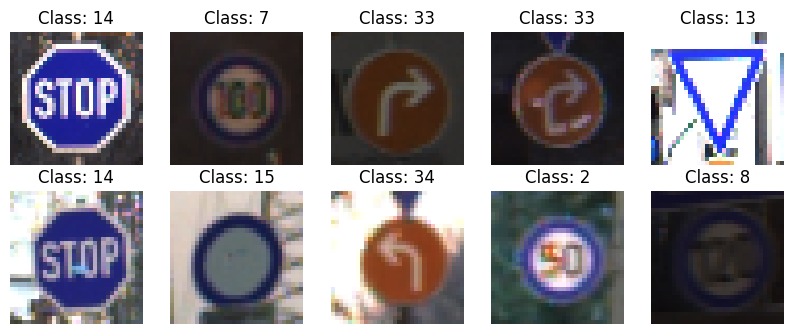

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, labels, num=10):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'Class: {np.argmax(labels[i])}')
        plt.axis('off')
    plt.show()

# Plot training images
plot_images(X_train, y_train)

In [ ]:
### Image Augmentation ###
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=15,        # Rotate images by up to 15 degrees
    zoom_range=0.2,           # Random zoom in/out by up to 20%
    width_shift_range=0.1,    # Shift the image horizontally by 10%
    height_shift_range=0.1,   # Shift the image vertically by 10%
    horizontal_flip=True,     # Randomly flip images horizontally
    #brightness_range=[0.8, 1.2],  # Adjust brightness randomly
    #shear_range=0.2           # Shear the image by up to 20%
)

# Fit the generator on the training data (only needed for some augmentations like ZCA)
datagen.fit(X_train)

# Create the augmented data generator for training
train_generator = datagen.flow(X_train, y_train, batch_size=32, shuffle=True)

##Visualization of Augmented Images

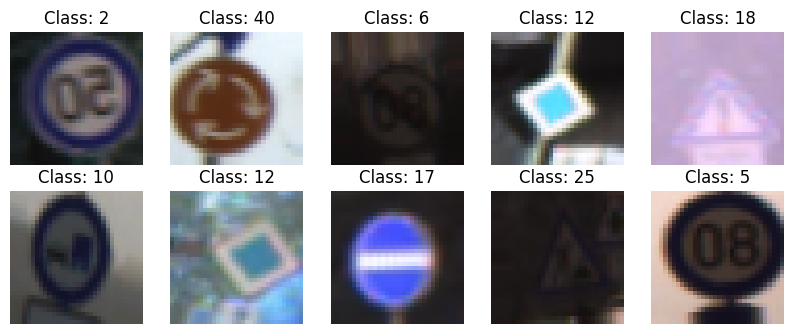

In [ ]:
import matplotlib.pyplot as plt

# Visualize some augmented images
augmented_images, augmented_labels = next(train_generator)

# Plot some examples
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(f'Class: {np.argmax(augmented_labels[i])}')
    plt.axis('off')
plt.show()

In [ ]:
### Model Training with Augmented Data ###
from tensorflow.keras import models, layers

# Build a simple CNN model
model = models.Sequential()

# Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Add more layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the augmented data generator
history = model.fit(train_generator, validation_data=(X_val, y_val), epochs=5, steps_per_epoch=len(X_train) // 32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


969/969 ━━━━━━━━━━━━━━━━━━━━ 38s 33ms/step - accuracy: 0.2391 - loss: 2.7217 - val_accuracy: 0.6515 - val_loss: 1.0537
Epoch 2/10
  1/969 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5000 - loss: 1.6569

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


969/969 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.5000 - loss: 1.6569 - val_accuracy: 0.6516 - val_loss: 1.0549
Epoch 3/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.6437 - loss: 1.0870 - val_accuracy: 0.8247 - val_loss: 0.5385
Epoch 4/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.6875 - loss: 0.9414 - val_accuracy: 0.8238 - val_loss: 0.5340
Epoch 5/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.7799 - loss: 0.6690 - val_accuracy: 0.8800 - val_loss: 0.3536
Epoch 6/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8125 - loss: 0.4062 - val_accuracy: 0.8770 - val_loss: 0.3552
Epoch 7/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.8466 - loss: 0.4695 - val_accuracy: 0.9130 - val_loss: 0.2620
Epoch 8/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8750 - loss: 0.3170 - val_accuracy: 0.9164 - val_loss: 0.2483
Epoch 9/10
969/969 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.8760 - loss: 0.3678 - val_accurac

In [ ]:
# Path to test CSV file
test_csv_path = '/content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/GT-final_test.test.csv'
# Load the test labels from the CSV file
test_data = pd.read_csv(test_csv_path, sep=";")

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f'Test accuracy: {test_acc}')

# Get model predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9338 - loss: 0.2039
Test accuracy: 0.934269905090332
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.92      0.79        48
           1       0.95      0.85      0.90       441
           2       0.95      0.83      0.88       453
           3       0.97      0.87      0.92       294
           4       0.79      1.00      0.88       376
           5       0.75      0.96      0.84       366
           6       0.99      0.98      0.98        84
           7       0.97      0.85      0.90       276
           8       0.97      0.81      0.88       281
           9       0.98      1.00      0.99       272
          10       1.00      0.98      0.99       407
          11       0.93      0.97      0.95       274
          12       1.00      1.00      1.00       423
          13       1.00      1.00      1.00       433
          14    

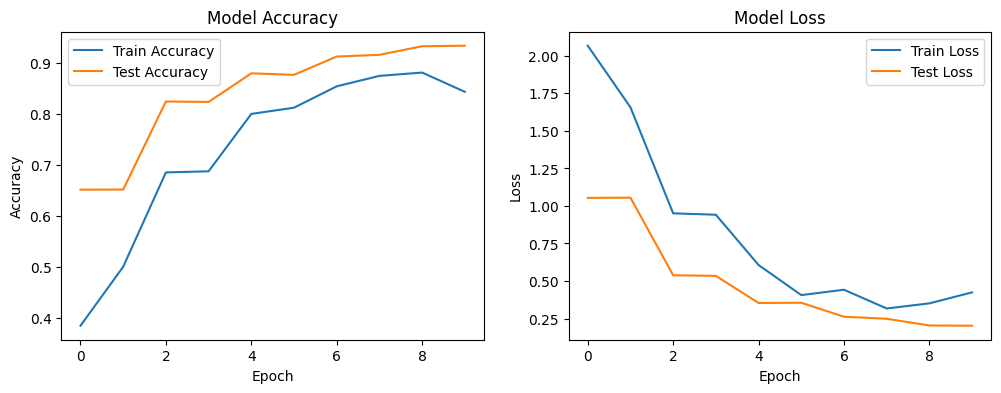

In [ ]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.show()

In [ ]:
# Load test images
def load_test_data(test_dir, test_csv):
    test_images = []
    test_labels = []

    # Load the test labels from the CSV file
    test_data = pd.read_csv(test_csv, sep=";")

    for index, row in test_data.iterrows():
        img_path = os.path.join(test_dir, row['Filename'])
        image = cv2.imread(img_path)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        test_images.append(image)
        test_labels.append(row['ClassId'])

    test_images = np.array(test_images, dtype='float32')
    test_labels = np.array(test_labels)

    return test_images, test_labels

# Path to test CSV file
test_csv_path = '/content/drive/My Drive/Data/GTSRB/Test/GTSRB/Final_Test/Images/GT-final_test.test.csv'

# Load test data
X_test, y_test = load_test_data(test_dir, test_csv_path)

# Normalize test images
X_test = X_test / 255.0

# One-hot encode the test labels
y_test = to_categorical(y_test, num_classes)

print(f'Test data shape: {X_test.shape}')

KeyError: 'ClassId'